# In class Assignment- 
Analyzing your `time sheet` using Pandas, Matplotlib and Seaborn modules.Save this file as InClassAssignment_Timesheet_xxxx where xxxx will be your initials
- Name:
- Date:
- Version: 

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset and save it to a dataframe named 'df'
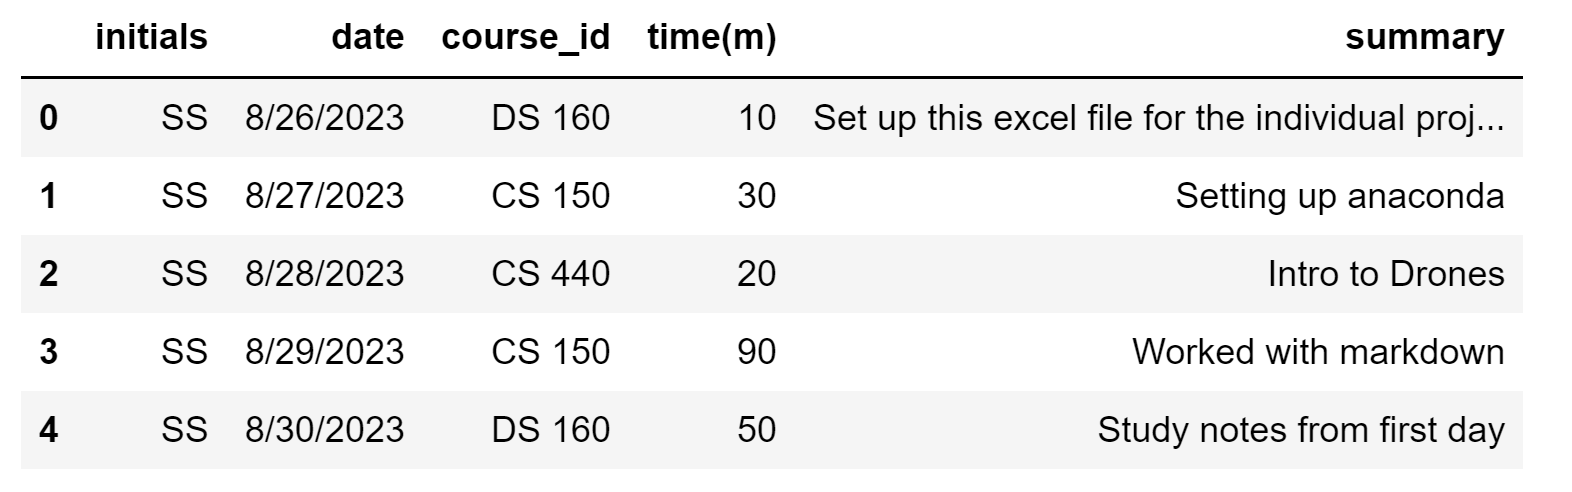

In [2]:
df = pd.read_csv('MEH_Timesheet_Project.csv')

### Investigate your dataset (head, tail, info)
- How many entries in your dataset?
- Is there any missing value?
- What are the data types?

In [3]:
df.head()

,Initial,Date,Course_ID,Time(m),Summary
0,MH,1/8/2024,CS 150,50,Class using Python and GitHub
1,MH,1/8/2024,CS 415,50,Class and Homework over Protocols
2,MH,1/9/2024,DS 160,75,Class using Datasets
3,MH,1/9/2024,CS 450,75,Class and Beginning Project Proposal
4,MH,1/10/2024,CS 150,50,Class using Python


In [4]:
df.describe()

,Time(m)
count,50.000000
mean,61.400000
std,14.916092
min,50.000000
25%,50.000000
50%,50.000000
75%,75.000000
max,120.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Initial    50 non-null     object
 1   Date       50 non-null     object
 2   Course_ID  50 non-null     object
 3   Time(m)    50 non-null     int64 
 4   Summary    50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [6]:
df['Course_ID'].value_counts()

CS 415    16
CS 150    14
DS 160    10
CS 450    10
Name: Course_ID, dtype: int64

Answer: There are 50 entries in each column in the data set. There are no missing values and all of the entries except for Time(m) are categorical data type, where Time(m) is an int data type. All of the 'Course_ID' entries are the same and there are no repeats in the data set.

### Summary Statistics
Calculate basic statistics for the 'Time (minutes)' column, such as mean, median, minimum, and maximum. This will give you an overview of how time is distributed across activities. use table and graphical representations (sample below)
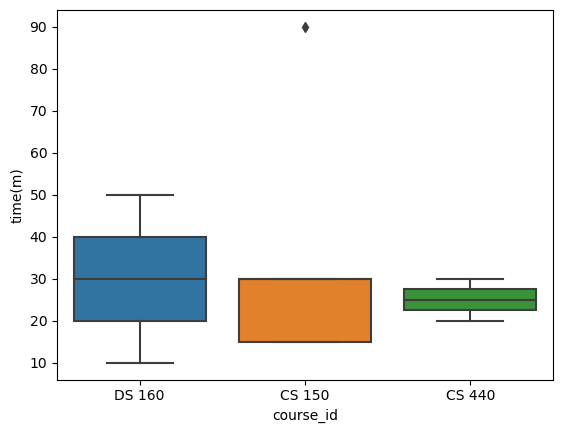

In [7]:
df.columns

Index(['Initial', 'Date', 'Course_ID', 'Time(m)', 'Summary'], dtype='object')

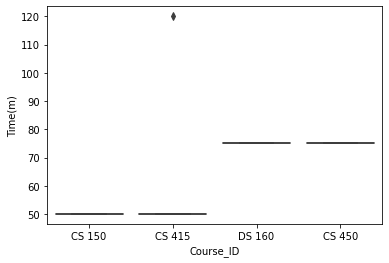

In [8]:
sns.boxplot(x = 'Course_ID', y = 'Time(m)', data = df)
plt.show()

Answer: This shows that for each class, I have spent an equal amount of time on each subject with each duration being either 50 minutes or 75 minutes. CS 415 has an outlier of 120 minutes, that differs a lot compared to the normal 50 minutes.

### Create two new columns "day" and "day_name" using the "Date" column in which the day will represent the range of days (sample below)
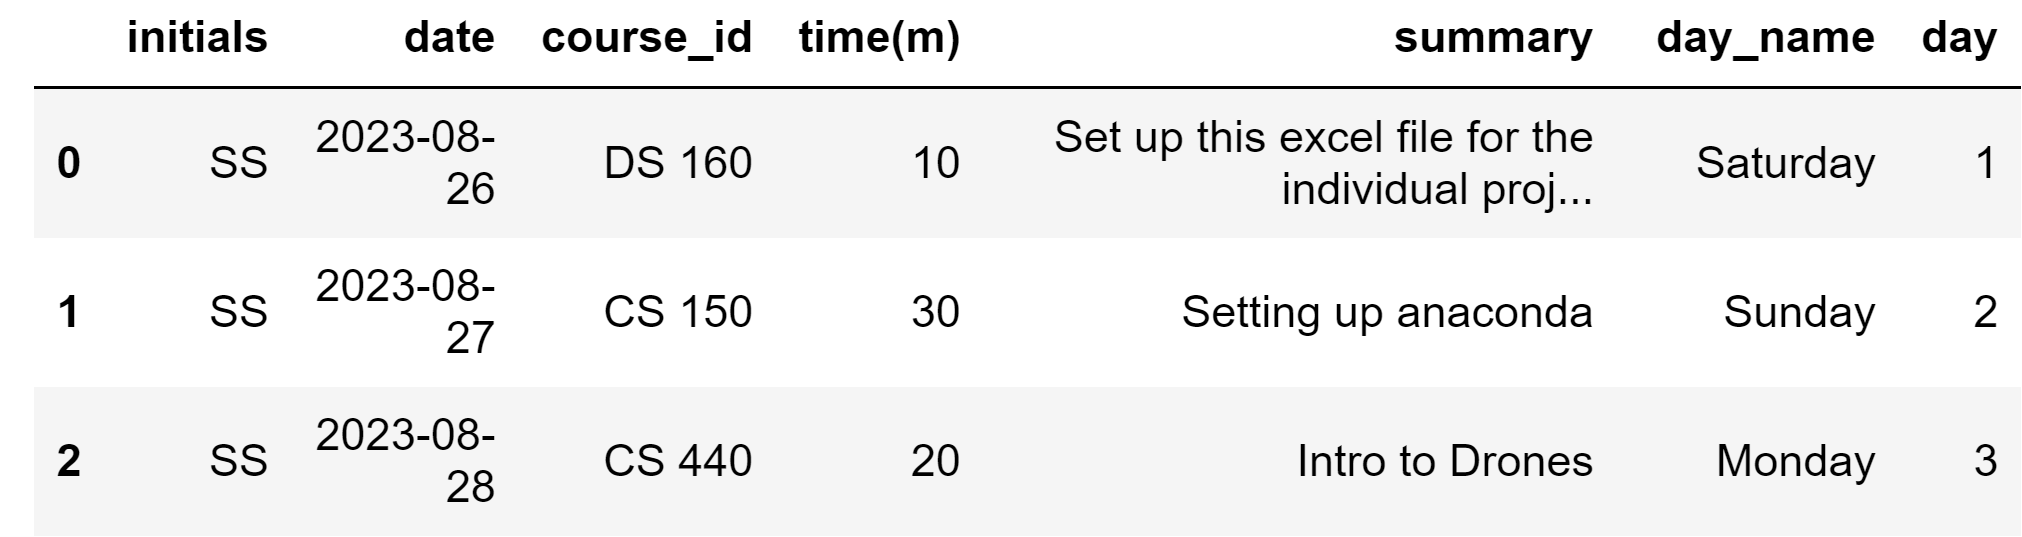
- df['day'] = range(1, len(df) + 1)

In [9]:
df.columns

Index(['Initial', 'Date', 'Course_ID', 'Time(m)', 'Summary'], dtype='object')

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Initial    50 non-null     object        
 1   Date       50 non-null     datetime64[ns]
 2   Course_ID  50 non-null     object        
 3   Time(m)    50 non-null     int64         
 4   Summary    50 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ KB


In [12]:
df['day_name'] = df['Date'].dt.day_name()

In [13]:
df.head()

,Initial,Date,Course_ID,Time(m),Summary,day_name
0,MH,2024-01-08,CS 150,50,Class using Python and GitHub,Monday
1,MH,2024-01-08,CS 415,50,Class and Homework over Protocols,Monday
2,MH,2024-01-09,DS 160,75,Class using Datasets,Tuesday
3,MH,2024-01-09,CS 450,75,Class and Beginning Project Proposal,Tuesday
4,MH,2024-01-10,CS 150,50,Class using Python,Wednesday


In [14]:
df['day'] = range(1, len(df) + 1)

In [15]:
df.head()

,Initial,Date,Course_ID,Time(m),Summary,day_name,day
0,MH,2024-01-08,CS 150,50,Class using Python and GitHub,Monday,1
1,MH,2024-01-08,CS 415,50,Class and Homework over Protocols,Monday,2
2,MH,2024-01-09,DS 160,75,Class using Datasets,Tuesday,3
3,MH,2024-01-09,CS 450,75,Class and Beginning Project Proposal,Tuesday,4
4,MH,2024-01-10,CS 150,50,Class using Python,Wednesday,5


In [16]:
df.tail()

,Initial,Date,Course_ID,Time(m),Summary,day_name,day
45,MH,2024-02-09,CS 150,50,In-Class Assignment,Friday,46
46,MH,2024-02-09,CS 415,50,In-Class Assignment,Friday,47
47,MH,2024-02-12,CS 150,50,Class Lecture,Monday,48
48,MH,2024-02-12,CS 415,50,Presentation from CS Candidate,Monday,49
49,MH,2024-02-12,CS 415,120,Studying for Midterm Exam,Monday,50


### Data Visualization:
1. Create a histogram to visually represent the distribution of time spent.
2. Create a  bar chart (sample below) to visually represent the distribution of time spent on different courses and comment on the course you spent most and least time
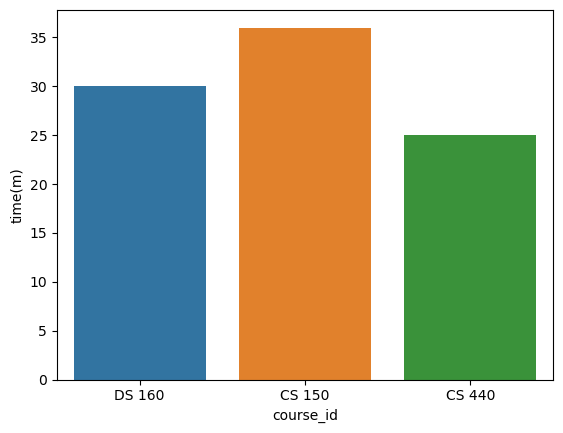

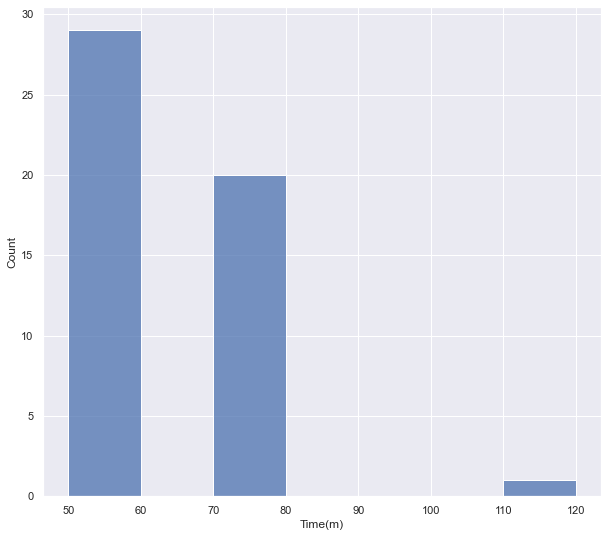

In [48]:
sns.set(rc = {'figure.figsize': (10, 9)})
sns.histplot(x = 'Time(m)', data = df)
plt.show()

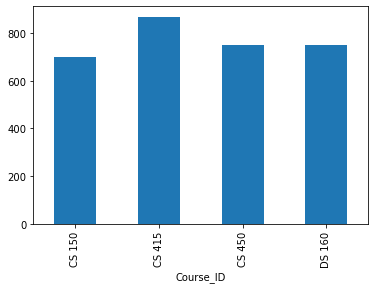

In [46]:
df.groupby(['Course_ID'])['Time(m)'].sum().plot(kind = 'bar')
plt.show()

Answer: I spent the most time in CS 415 according to the bar plot, and the histogram shows that I spent more time in my 50 minute classes CS 150 and CS 415 than I did in my 75 minute classes DS 160 and CS 450. I spent the least amount of time in CS 150 according to the bar plot.

### Activity Counts:

Count the occurrences of each course in the dataset to see `how often` you engaged in each.

In [49]:
df['Course_ID'].value_counts()

CS 415    16
CS 150    14
DS 160    10
CS 450    10
Name: Course_ID, dtype: int64

Answer: This shows that I have engaged the most in CS 415 and the least in DS 160 and CS 450. For CS 150, it was in the middle with me engaging in it slightly less than CS 415.

### Time Trends:

Plot a line chart (sample below) to visualize how time spent on activities changes over the observed days.
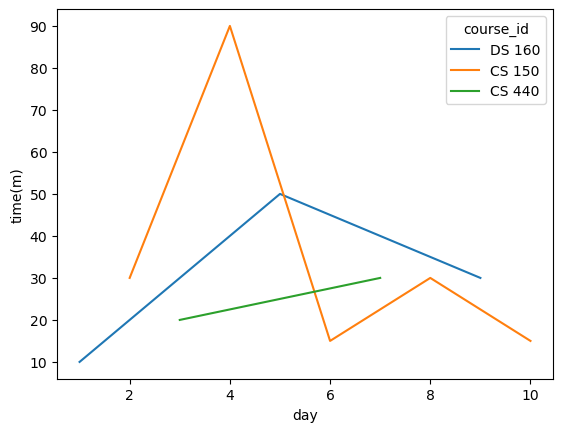

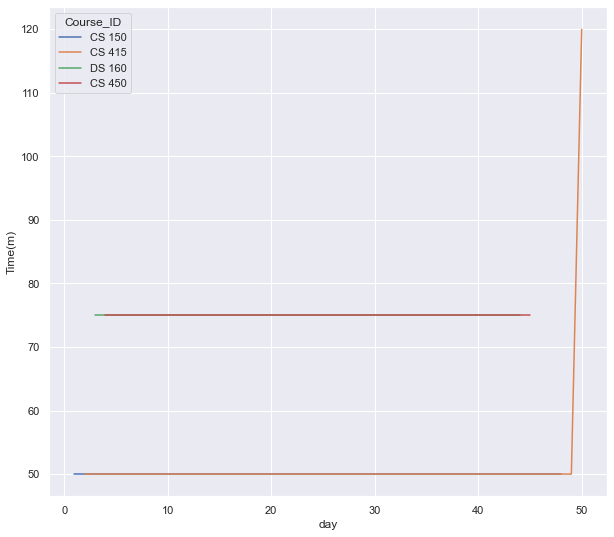

In [52]:
sns.lineplot(x = 'day', y = 'Time(m)', hue = 'Course_ID', data = df)
plt.show()

Answer: This shows that the trend is extremely similar for all of the courses except there is a spike in CS 415.

### Course Analysis:

For each course ex.(DS 160, CS 150, CS 440), calculate the total time spent. Which course received the most time, and which received the least?
- Sample print statement: Total time spent on CS160: 180 min

In [72]:
df.groupby(['Course_ID'])['Time(m)'].sum()

Course_ID
CS 150    700
CS 415    870
CS 450    750
DS 160    750
Name: Time(m), dtype: int64

In [73]:
print('Total Time Spent on CS 150: 700 min')
print('Total Time Spent on CS 415: 870 min')
print('Total Time Spent on CS 450: 750 min')
print('Total Time Spent on DS 160: 750 min')

Total Time Spent on CS 150: 700 min
Total Time Spent on CS 415: 870 min
Total Time Spent on CS 450: 750 min
Total Time Spent on DS 160: 750 min


Answer: I spent the most time on CS 415 with 870 minutes and I spent the least amount of time on CS 150 with 700 minutes.

### Correlations:
- Examine whether there are any correlations between the day and the time spent. For example, do you spend more time on courses over days or less (sample below).
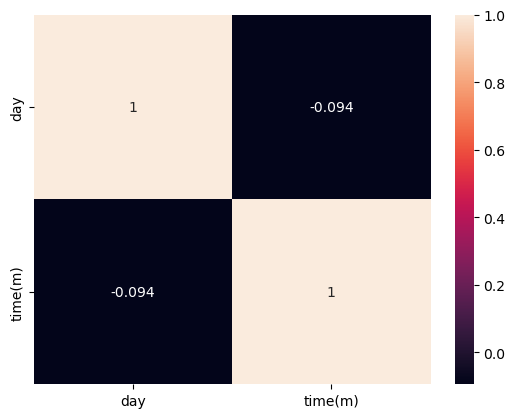

In [74]:
corr = df[['day', 'Time(m)']].corr()
print(corr)

              day   Time(m)
day      1.000000  0.081187
Time(m)  0.081187  1.000000


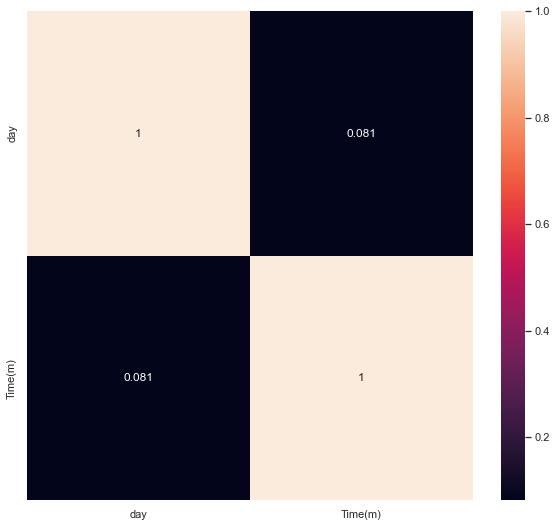

In [75]:
sns.heatmap(corr, annot = True)
plt.show()

Answer: This shows that there is an extremely weak positive correlation between time spent on certain days.

### Your Reflection on the findings

I spent most of my time on CS 415 since it had the most time spent on it. This is possibly due to the spike of 120 minutes that was found that caused it to have more time designated to it than the other three subjects. There was also an extremely weak correlation between the day and time spent with 0.08%. There was also a solid trend of the same time being spent on the classes each time. This shows that there was only one outlier in CS 415 while the other subjects were consistent over there day and times. I spent the least time on CS 150 which can be because only 50 mintues is spent on it each time. There was no outlier either which explains why its time was significantly lower than CS 415 and why it was lower than the other two 75 minute classes CS 450 and DS 160.

### Submit the work by Friday 16th end of the day